# 고급통계

특정 데이터 표본을 기반으로 전체 모집단을 추론해보려고 한다. 주어진 데이터 표본을 통해 모집단에 대한 더 나은 이해를 얻기 위해 다른 추정 검정과 함께 가설을 검정한다.

## Goal

- 점 추정치
- 신뢰 구간
- 중심 극한 정리
- 가설 검정


## 00. 점 추정치(Point estimate)

표본 데이터를 사용해 모수의 추정치인 통계를 계산해야 한다. 이러한 추정치를 만드는 것을 점 추정치라고 부른다.

Point estimate 는 표본 데이터를 기반으로 한 모집단 모수의 추정치다.

 점 추정치를 사용해 모집단의 평균, 분산 및 기타 통계를 추정한다. 이러한 추정치를 얻으려면 모집단을 측정하기 위한 데이터 표본에 점 추정치를 적용하면 된다. 예를 들어 직원이 9,000명인 회사가 있다고 가정하고, 직원의 하루 평균 휴식 시간을 확인하는 데 관심이 있다고 하자. 한 사람씩 질문할 수 없으므로 9,000명에서 표본을 추출해 표본의 평균을 취할 것이다. 이 표본의 평균이 점 추정치다. 

다음은 3부분으로 나눌 수 있다.

- 푸아송 분포(Poisson distribution)라고 알려진 확률 분포를 사용해 질문에 대한 9,000개의 답변을 무작위로 생성한다. 보통 하루에 몇 분 정도 휴식을 취하는가? 이것은 '모집단'을 나타낸다.
- 파이썬의 무작위 표본 추출법을 사용해 100명 직원의 표본을 얻고 평균의 추정치(표본 평균)를 구한다.
- 표본 평균(100명 직원의 표본 평균)과 모집단 평균을 비교한다.

In [146]:
import numpy as np
import pandas as pd

from scipy.stats import poisson
np.random.seed(1234)

long_breaks = poisson.rvs(loc=10, mu=100, size=3000)

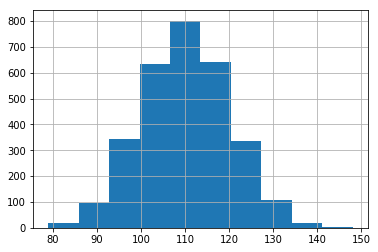

In [147]:
pd.Series(long_breaks).hist()

In [28]:
breaks = np.concatenate((long_breaks, short_breaks))
# 두 개의 배열을 하볓서 9000명으로 구성된 "모집단"

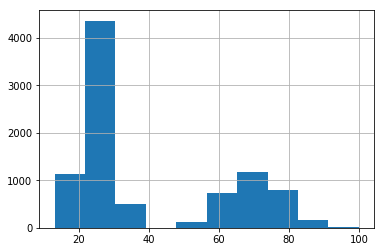

In [29]:
pd.Series(breaks).hist()

두 개의 혹을 보면 왼쪽에는 약 15분간 휴식을 취하는 사람들의 긴 훅이 있고, 오른쪽에는 더 긴 휴식을 취하는 사람들의 작은 훅이 있다.

In [30]:
breaks.mean()

39.99344444444444

**모집단의 전체 인원은 9000명 모수는 40분이라는 사실을 기억하자**


9000명의 직원중 100명을 무작위로 추출하는 방식을 구현해보자

In [67]:
sample_breaks = np.random.choice(a=breaks, size=100)
# 직원 100명의 표본 추출

이제 표본의 평균을 취하고 모집단 평균에서 빼서 얼마나 멀리 떨어져 있는지 보자.

In [68]:
breaks.mean() - sample_breaks.mean()

-0.25655555555555765

모집단의 약 1%는 매우 흥미롭... ? 

그냥 평균을 뺸 값.

*평균에 대한 점 추정치를 계산했지만*, **비율 모수(proportion parameters)** 에 대해서도 이를 수행할 수 있다. 2개의 정랼적 가치로 비율에 대해 알아보자.

10,000명의 직원이 있는 회사에서, 직원은 백인 20%, 흑인 10%, 히스패닉 10% 아시아인 30%, 기타 30%로 파악된다고 가정하자.

In [78]:
employee_races = (["white"] * 2000) + (["black"] * 1000) + (["hispanic"] * 1000) + (["asian"] * 3000) + (["other"] * 3000)

In [79]:
import random
demo_sample = random.sample(employee_races, 1000) # 표본 값 1000
for race in set(demo_sample):
    print(race + " proportion estimate:")
    print(demo_sample.count(race)/ 1000)

hispanic proportion estimate:
0.093
white proportion estimate:
0.199
black proportion estimate:
0.109
other proportion estimate:
0.317
asian proportion estimate:
0.282


인종 비율 추정치는 근본적인 모집단 비율에 매우 가깝다는 것을 알 수 있다.

## 01. 표본 분포

데이터가 정규분포를 따른다면 정말 좋다. 그 이유 중 하는 많은 통계 검정이 정상적인 패턴을 따르는 데이터에 의존하지만, 대부분의 실제 데이터는 정상이 아니다. 예를 들어 직원 휴식 데이터를 가져다가 푸아송 분포를 사용해 데이터를 생성하는 것이 멋지다고 생각할 수도 있지만, 나는 비표준 데이터를 사용할 예정

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b012c88>]],
      dtype=object)

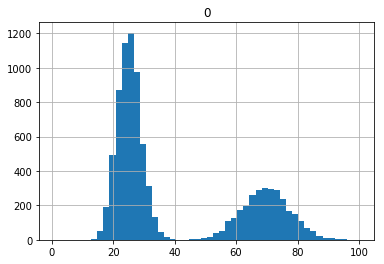

In [118]:
pd.DataFrame(breaks).hist(bins=50, range=(1,100)) # x 휴식시간 y 사람 수.

일반적인 정규 분포를 따르지 않고 이중 모드(bi-modal)인 것처럼 보임. 즉, 약 25분과 70분의 휴식 시간에 두 번의 피크가 있음을 의미한다.
데이터가 정상적이지 않기 떄문에 가장많이 사용되는 통계 검정이 적용되지 않을 수 있다. 그러나 주어진 절차를 따르면 정상적인 데이터를 생성할 수 있다.

우선 동일한 크기로 여러 표본의 점 추정치 분포인 표본 분포를 활용해야 한다. 표본 분포를 만드는 절차는 다음과 같다.  
1. 휴식 시간의 크기가 100인 서로 다른 표본 500개를 가져온다.  
2. 500개의 서로 다른 점 추정치에 대한 막대그래프를 만든다.(분포를 드러냄)  

표본의 요소 수(100)는 임의적이지만, 모집단의 대표 표본이 될 만큼 충분히 크다. 여기서 취한 표본의 수(500)도 임의적이지만 데이터가 정규 분포로 수렴될 만큼 충분히 크다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c173320>]],
      dtype=object)

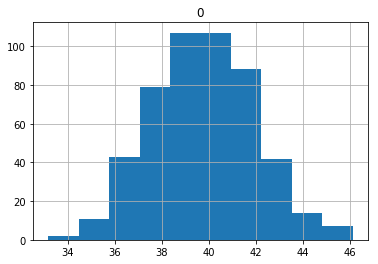

In [145]:
point_estimates_append = []
for x in range(500):
    sample = np.random.choice(a=breaks, size=100)
    # 100포인트의 표본을 취한다.
    point_estimates_append.append(sample.mean())
# 표본 평균을 점 추정치의 목록에 추가한다.
pd.DataFrame(point_estimates_append).hist()
# 표본 평균의 분포를 살펴본다.

표본 평균의 표본 분포는 기본적인 이중 모드 모집단 분포에서 데이터를 취했음에도 불구하고 정상적인 것처럼 보인다.  

이 히스토그램의 막대는 500명의 대한 표본의 평균 휴식 시간을 나타내며, 각 표본 박스에는 100명이 있다는 점에 유의해야 한다. 

**즉, 표본 분포는 여러 점 추정치의 분포이다.**

이 데이터는 **중심 극한 정리(central limit theorem)** 라고 불리는 이유로 인해 정규 분포로 수렴된다. 이것은 취하는 표본 수를 늘릴 때 표본 분포(점 추정치의 분포)가 정규분포에 접근한다는 의미다.

또한 표본을 더 많이 사용함에 따라 표본 분포의 평균은 다음과 같이 실제 모집단 평균에 근접한다.

In [162]:
breaks.mean() - np.array(point_estimates_append).mean()

0.2247244444444405

## 신뢰 구간

점 추정치는 모집단 모수에 대한 추정치며, 표본 분포는 휠씬 우수하지만 이러한 접근법에서는 다음과 같은 두 가지 주요 문제가 있다.

- 단일 점 추정치는 오류가 발생하기 쉽다.(무엇보다도 표본 추출 편향 때문이다.)
- 표본 분포를 위해 특정 크기의 여러 표본을 취하는 것은 실행 불가능할 수 있으며, 때로는 실제 모집단 모수를 찾는 것보다 휠씬 더 실행 불가능할 수 있다.

이러한 이유로 인해 신뢰 구간이라는 개념으로 전환해 통계를 살펴보자.
**신뢰구간(confidence interval)** 은 일부 신뢰 수준에서 실제 모집단의 모수를 포함하는 점 추정치에 기반을 둔 값의 범위다.
**신뢰도(Confidence)** 는 고급 통계에서 중요한 개념이다. 이 의미는 때때로 잘못 해석된다.

비공식적으로 신뢰 수준이 '올바른 확률'을 의미하는 것은 아니다. 대신에 이것은 얻은 답이 정확할 빈도를 나타낸다. 예를 들어 단일 점 추정치만 사용해 실제 모집단 모수를 담을 확률이 95%가 되려면 신뢰 수준을 95%로 설정해야 한다.

> 더 확실히 하기 위해서 신뢰 수준이 높을 수록 신뢰 구간이 넓어지고 커진다.

신뢰 구간을 계산하는 것은 점 추정치를 찾는 것이 포함되며, 오차 범위를 포함해 범위를 만든다. 오차 범위(margin of error)는 점 추정치가 정확하고 원하는 신뢰 수준, 데이터의 분산, 표본의 크기를 기반으로 확실성을 나타내는 값이다 신뢰 구간을 계산하는 방법은 여러 가지가 있다. 간결하고 단순하게 모집단 평균의 신뢰 구간을 취하는 한 가지 방법을 살펴볼 것이다. 이 신뢰 구간을 위해 다음과 같은 것이 필요하다.

- 점 추정치로, 이를 위해 앞의 예제에서 휴식 길이의 표본 평균을 취한다.
- 데이터의 분산을 나타내는 모집단 표준 편차의 추정치다.
    - 이것은 표본 표준 편차(표본 데이터의 표준 편차)를 취하고 그 수를 모집단 크기의 제곱근으로 나눠서 계산한다.
- 자유도(표본 크기 -1)다.

이 수를 얻는 것이 임의적으로 보일지 모르지만, 모든 수에 대해 이유가 있다. 간단하게 다음과 같이 미리 내장된 파이썬 모듈을 사용해 신뢰 구간을 계산한 다음 그 값을 보여준다.

In [168]:
import math
from scipy import stats
# 신뢰 구간을 만드는 함수
def makeConfidenceInterval():
    sample_size=100
    # 채취할 표본의 크기

    sample = np.random.choice(a= breaks, size = sample_size)
    #이전에 휴식 모집단 9,000개에서 채취한 sample_size의 표본

    sample_mean = sample.mean()
    #표본 평균

    sample_stdev = sample.std()
    #표본 표준 편차

    sigma = sample_stdev/math.sqrt(sample_size)
    #모집단 표준 편차 추정치
    return stats.t.interval(alpha=0.95, df =sample_size-1, loc=sample_mean, scale=sigma) # (36.36, 45.44)

다시 말하면 이 값 범위(36.36에서 45.44까지)는 95% 신뢰도로 평균 휴식 시간에 대한 신뢰 구간을 나타낸다.
이제 단일 신뢰 구간을 만드는 함수가 있으므로, 단일 신뢰 구간에 실제 모집단 모수 39.99가 포함될 확률을 검정하는 프로시저를 만들자.

앞서 말했든이 신뢰 수준은 구간의 정확도에 대한 백분율이 아니라, 구간에 모집단 모수가 다소 포함될 확률이다.

신뢰 수준을 더 잘 이해하기 위해 신뢰 구간 10,000을 사용하고 그 구간에서 모집단 평균이 얼마나 자주 떨어지는지 확인하자. 먼저 다음과 같이 휴식 데이터에서 단일 신뢰 구간을 설정하는 함수를 만든다.

아래는 단일 신뢰 구간을 만드는 함수를 활용해 실제 모집단 모수 39.99가 포함될 확률을 검정하는 프로시저를 만든다.

1. 표본 평균의 신뢰 구간 10,000을 가져온다.
2. 모집단 모수가 신뢰 구간에 속하는 횟수를 센다.
3. 모수가 10,000 구간만큼 감소한 횟수의 비율을 출력한다.

In [173]:
times_in_interval = 0.
for i in range(10000):
    interval=makeConfidenceInterval()
    if 39.99 >= interval[0] and 39.99 <= interval[1]:
        # 그 구간에 39.99가 떨어지면
        times_in_interval += 1
print(times_in_interval/10000)

0.9509


신뢰 구간이 약 95%가 실제 모집단 평균을 포함한다는 것을 알 수 있습니다. 점 추정치와 신뢰 구간을 통해 모집단 모수를 추정하는 것은 상대적으로 간단하고 강력한 통계적 추론의 한 형태이다.

이번에는 신뢰 수준을 변경할 때 신뢰 구간의 크기가 어떻게 변하는지 간략하게 살펴보자.

여러 신뢰 수준에 대한 신뢰 구간을 계산하고 두 수 사이의 차이를 보고 간격이 얼마나 큰지를 살펴보자.

우리의 가설은 신뢰 수준을 더 크게 만들면 실제 모집단 모수를 표현한다는 것을 확신하기 위해 더 큰 신뢰 구간을 본다는 것이다.

In [179]:
import math
from scipy import stats
# 신뢰 구간을 만드는 함수
def makeConfidenceInterval():
    sample_size=100
    # 채취할 표본의 크기

    sample = np.random.choice(a= breaks, size = sample_size)
    #이전에 휴식 모집단 9,000개에서 채취한 sample_size의 표본

    sample_mean = sample.mean()
    #표본 평균

    sample_stdev = sample.std()
    #표본 표준 편차

    sigma = sample_stdev/math.sqrt(sample_size)
    #모집단 표준 편차 추정치    
    for confidence in (.5,.8,.85,.9,.95,.99):
        confidence_interval = stats.t.interval(alpha=confidence, df =sample_size-1, loc=sample_mean, scale=sigma) # (36.36, 45.44)
        print(f'confidence_interval: {confidence_interval}')
        length_of_interval = round(confidence_interval[1] - confidence_interval[0], 2)

        # 신뢰 구간의 거리
        print(f'confidence {confidence} has a interval of size {length_of_interval}')

In [180]:
makeConfidenceInterval()

confidence_interval: (40.66267359129131, 43.63732640870869)
confidence 0.5 has a interval of size 2.97
confidence_interval: (39.31549593308449, 44.984504066915505)
confidence 0.8 has a interval of size 5.67
confidence_interval: (38.96259626400597, 45.33740373599403)
confidence 0.85 has a interval of size 6.37
confidence_interval: (38.50209569048492, 45.797904309515076)
confidence 0.9 has a interval of size 7.3
confidence_interval: (37.790645553741356, 46.50935444625864)
confidence 0.95 has a interval of size 8.72
confidence_interval: (36.37974776257947, 47.92025223742053)
confidence 0.99 has a interval of size 11.54


## 가설 검증(hypothesis test)

데이터 표본으로 전체 모집단에 대해 특정 조건이 참이라고 가정할 수 있는지 여부를 확인하는 데 사용되는 통계적 검정이다. 기본적으로 가설 검정은 전체 모집단에 대해 갖고 있는 가설에 대한 검정이다. 그런 다음 실험 결과는 우리가 가설을 믿어야 하는지 또는 다른 대안을 위해 가설을 기각해야 하는지를 말해준다.


관측된 표본 데이터가 모집단 자체에서 기대했던 것과는 거리가 있는지 결정하기 위해 가설 검정의 틀을 생각할 수 있다. 지금은 어려운 일처럼 들리지만 운 좋게도 파이썬은 이 검정을 쉽게 수행 할 수 있는 내장된 라이브러리를 포함한다.

가설 검정은 일반적으로 모집단에 관한 두 가지 반대 가설을 조사한다.

그것은 **귀무가설(null hypothesis)** 및 **대립가설(alternative hyothesis)** 이라고 부른다. null hypothesis은 검정되는 문장이며 기본 정답이다. 이것은 출발점이자 원래의 가설이다. alternative hyothesis은 귀무가설에 반대하는 진술이다. 검정은 어떤 가설을 신뢰할 수 있고 어떤 가설을 기각해야 하는지 알여준다.

모집단의 표본 데이터를 바탕으로 가설 검정은 귀무가설의 기각여부를 결정한다. 이 결론을 내리기 위해 대개 P 값(유의 수준에 기초한)을 사용한다.

**가설 검증이란 이런 것이다.**

1. 직원들의 평균 휴식 시간이 40분과 다른가?
2. 웹사이트 A와 상호작용한 사람들과 웹 사이트 B와 상호작용한 사람들 간에 차이가 있는가? (A/B테스트)?
3. 커피 콩 표본이 콩 전체 모집단의 맛과 크게 다른가?

#### 가설 검정 진행

여러 유형의 가설 검정이 있으며, 그중에는 수십가지의 서로 다른 프로시저와 측정 지표가 있다. 그럼에도 불구하고 대부분의 가설 검정이 따르는 다섯 가지 기본 단계가 있는데, 다음과 같다.

1. 가설을 지정한다.
    - 여기에는 두 가지 가설, 즉 귀무가설(null hypothesis) 및 대립가설(alternative hyothesis) 을 공식화한다.
    - 대게 null hypothesis을 나타내기 위해 H0의 표기법을 사용하고 대립가설을 나타내기 위해 Ha를 사용한다.
2. 검정 표본의 표본 크기를 결정한다.
    - 이 계산은 선택한 검정에 따라 다르다. 일반적으로 중심 극한 정리와 같은 원리를 이용하기 위해서는 적절한 표본 크기를 결정해야 하고, 데이터의 정규성을 가정해야 한다.
3. 유의 수준(일반적으로 알파 또는 a라고 함)을 선택한다.
    - 유의 수준 0.05가 일반적이다.
4. 데이터를 수집한다.
    - 검정을 수행하기 위해 데이터 표본을 수집한다.
5. 귀무가설을 기각할 것인지 채택할 것인지 결정한다.
    - 이 단계는 사용되는 검정 유형에 따라 약간 변경된다. 최종 결과는 대안에 찬성해 귀무가설을 기각하거나 귀무가설을 기각하지 못하게 할 것이다.
    
8장에서는 다음 세 가지 유형의 가설 검정을 살펴볼 것이다.
- 단일 표본 t-테스트
- 카이 제곱(chi-square) 적합성
- 연관성/독립성에 대한 카이 제곱 검정

더 많은 검정 방법이 있지만, 이 세 가지 방법이 뚜렷하고 단순하며, 강력한 검정을 하는 훌룡한 조합이다.

구현해야 할 검정을 선택할 때 고려해야 할 가장 중요한 사항 중 하나가 작업하고 있는 데이터 유형, 구체적으로는 연속 데이터나 범주 데이터를 다루는 것이다. 가설의 효과를 진정으로 확인하기 위해 예를 들어 설명할 것이다. 먼저 연속 데이터를 처리하기 위한 t-테스트의 사용을 살펴보자.

### 단일 표본 t-테스트

단일 표본 t-테스트(one-sample t-test)는 양적(수치)데이터 표본이 다른 표본(모집단 또는 다른 표본)과 주요하게 다른지 여부를 결정하는 데 사용되는 통계 검정이다. 앞에서 다룬 직원 휴식 시간의 예에는, 구체적으로 엔지니어링 부서의 휴식 시간을 다음과 같이 살핀다.

In [182]:
long_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=55, size=100)
shoart_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=15, size=300)
engineering_breaks = np.concatenate((long_breaks_in_engineering, shoart_breaks_in_engineering))

print(f'breaks : {breaks.mean()}')
print(f'engineering_breaks : {engineering_breaks.mean()}')

breaks : 39.99344444444444
engineering_breaks : 35.11


원래 휴식 시간을 만들 때와 같은 방법을 사용했지만, 다음 두 가지 차이점이 있다.

- 푸아송 분포에서 더 작은 표본을 취했다.(엔지니어링 부서에서 400명의 표본을 채취하는 것을 시뮬레이션하기 위해)
- 전과 같이 mu 값으로 60을 사용하는 대신, 엔지니어링 부서의 휴식 행동이 회사의 전체 행동과 정확히 같지 않다는 사실을 시뮬레이션하기 위해 55을 사용했다.

엔지니어링 부서와 회사 전체의 차이(5분 이상)가 있는 것을 쉽게 볼 수 있다. 일반적으로 전체 모집단과 모집단 모수를 처리할 수는 없지만, 예제 작업을 보기 위해 시뮬레이션했다. 따라서 여러분이 차이를 볼 수 있다고 하더라도 이러한 모집단 모수에 대해서는 알지 못하며, 대신 이러한 차이를 확인하기 위해 통계적 검정에 의존하게 된다.

##### 단일 표본 t-테스트의 예

목표는 전체 모집단(회사 직원)의 휴식 시간에 엔지니어링 부서 직원의 휴식 시간 사이에 차이가 있는지 확인하는 것이다. 차이점을 찾기 위해 95% 신뢰 수준에서 t-테스트를 실행한다. 기술적으로 말하자면 이 검정은 표본이 모집단과 동일한 분포에서 나온 것인지를 알려준다.

##### 단일 표본 t-테스트의 가정

다음 2가지의 가정을 충족해야 한다.
- 모집단 분포가 정상이거나 표본이 커야 한다.(n >= 30)
- 표본이 독립적으로 무작위 표본 추출됐다는 가정을 위해 모집단 크기가 표본 크기보다 적어도 10배(10n < N)가 되도록 통제돼야 충분하다.

검정은 근본적인 데이터가 정상이거나 표본 크기가 30포인트 이상이어야 한다는 것을 명심하자. t-테스트의 경우 이 조건은 정규성을 가정하기에 충분하다. 이 검정은 또한 독립성을 요구하며, 이는 충분히 작은 표본을 취함으로써 충족된다. 이상하게 들릴 것이다. 기본 개념은 표본이 정규성을 취할 수 있을 정도로 충분히 커야하지만(중심 극한 정리와 비슷한 결론을 통해), 모집단과 독립적일 만큼 충분히 작아야 한다는 것이다.

이제 다섯 가지 단계를 따라가 보자.

1. 가설을 지정한다.
    H0 = 회사 전체와 똑같이 엔지니어링 부서가 휴식을 취하게 한다.
    이것을 회사 평균이라고 하면 다음과 같이 쓸 수 있다.
    
    H0:
    이것이 어떻게 귀무가설 또는 기본 가설인지 유의하자. 데이터가 없다고 가정한다. 제시하고자 하는 것은 대립가설이다.  
    이제 대립에 대한 몇 가지 옵션이 생겼으므로 엔지니어링 부서의 평균은 회사 평균보다 낮거나, 회사 평균보다 높거나 또는 회사 평균보다 완전히 다르다(높거나 낮다)고 말할 수 있다.
    
    - 표본 평균이 회사 평균과 다르다면 이것을 양측 검정(two-tailed test)이라고 부르며 대립가설은 다음과 같다.
    
    Ha:
    
    - 표본 평균이 회사 평균보다 낮거나 표본 평균이 회사 평균보다 높다면 단측 검정(one-tailed test)을 다루는 것이며, 대립가설은 다음 가설 중 하나이거나 다른 것이 될 것이다.
    
    Ha:(엔지니어링이 더 휴식을 취함)
    Ha:(엔지니어링이 덜 휴식을 취함)

단측 검정과 양측 검정의 차이는 나중에 수를 2로 나누는 것과 그렇지 않은 것의 차이다. 프로세스는 둘 다 완전히 변경되지 않는다. 예를 들면 양측 검정을 선택한다. 따라서 엔지니어링 부서 표본의 평균 휴식 기간이 회사 평균과 다른지 여부를 검정한다.

2. 검정 표본의 표본 크기를 결정한다.

앞서 언급했듯이 대부분의 검정(이것을 포함해)은 기본 데이터가 정상이거나 표본이 올바른 범위에 있다고 가정한다.
- 표본은 최소 30포인트(400)다.
- 표본은 모집단의 10%미만(900명)

3. 유의 수준(일반적으로 알파 또는 a라고 함)을 선택한다.
95% 유의 수준을 선택한다. 즉, 알파는 실제로 1- .95 = .05임을 의미한다.

4. 데이터를 수집한다.
두 개의 푸아송 분포를 통해 생성

5. 귀무가설(null hypothesis)을 기각할 것인지 채택할 것인지를 결정한다. 이 단계는 사용된 ㄱ머정에 따라 다르다. 단일 표본 t-테스트의 경우 검정 통계량과 p 값, 두 개의 수를 계산해야 한다. 다행히 파이썬에서 한 줄로 이것을 실행 할 수 있다.

검정 통계량은 가설 검정 유형 중 표본 데이터에서 파생된 값이다. 이것은 귀무 가설을 기각할지 여부를 결정하는 데 사용된다. 검정 통계량은 p값과 함께 사용됨.

p 값은 관측된 데이터가 우연히 이 방법으로 발생할 확률.

데이터가 귀무가설에 대해 매우 강한 중거를 보여줄 때 검정 통계량은 커지고(양수 또는 음수) p값은 대개 매우 작아지며, 이것은 검정이 강력한 결과를 보여주고 있으며, 우연히 일어난 일이 아닐는 것을 의미한다.

t-테스트의 경우 t값은 다음과 같은 검정 통계량이다.

In [183]:
t_statistic, p_value = stats.ttest_1samp(a=engineering_breaks, popmean=breaks.mean())

engineering_breaks 변수( 사람 수 400을 보유)와 모집단 평균을 입력하면 다음과 같은 숫자를 얻는다.

In [184]:
t_statistic

-5.486452073060336

In [188]:
p_value

7.299161202987625e-08

t_statistic 값이 나타내는 것은 귀무가설과 표본 평균의 편차를 나타내는 표준화된 측정 지표다. p값은 최종 결과를 제공.

p 값은 결과가 우연히 얼마나 자주 나타날지 알려준다. 예를 들면 p 값이 0.06이면 우연히 이데이터를 약 6%의 시간 동안 관측할 것으로 예상된다. 이것은 약  6%의 표본이 이와 같은 결과를 산출한다는 것을 의미한다.

p값이 유의 수준과 비교하여 작으면 귀무가설을 기각할 수 있고, 크다면 기각하지 못한다.
여기서 p값은 0.05보다 낮다. 즉, 기각 가능.

단측 검정(앞에서 언급했음)과 양측 검정뿐만 아니라 두 개의 표본 t-테스트(둘다 아직 언급 ㄴ)를 비롯한 많은 다른 유형의  t-테스트가 있다. 이 절차는 통계 문헌에서 쉽게 찾을 수 있다. 그러나 만약 검정이 잘못했을 때 어떻게 될까?



### 범주형 변수에 대한 가설 검증

t-테스트은 양적 변수와 근본적인 모집단 분포를 비교하고 대조하는 가설 검정이다. 이 절에서는 두 가지 새로운 검정을 살펴본다. 두 가지 검정 모두 질적 데이터를 탐색한다

- 범주형 변수의 표본을 특정 모집단에서 취했는지 여부를 결정한다.(t-테스트와 유사)
- 두 변수가 서로 영향을 주고 서로 연관돼 있는지 확인한다.

#### 카이 제곱 적합성 검증

표본 평균이 모집단 평균과 다른지 확인하기 위해 단일 표본 t-테스트를 사용했다. **카이 제곱 적합성 검정**은 표본 데이터의 분포가 예상 분포와 일치하는지 검정한다는 점에서 단일 표본 t-테스트와 매우 유사하지만, 큰 차이는 **범주형 변수**를 검정한다는 점이다.

예를 들어 회사의 인종 통계가 미국 전체 도시의 인종 통계와 일치하는지 확인하기 위해 카이 제곱 적합성 검정이 사용된다. 또한 회사의 웹사이트 사용자가 평균적인 인터넷 사용자와 유사한 특성을 보이는지 확인할 때도 사용할 수 있다.

범주형 데이터로 작업할 때 '남성', '여성' 또는 '기타'와 같은 범주에는 수학적인 의미가 없으므로 주의해야 한다. 그러므로 실제변수 자체보다는 변수의 수를 고려해야 한다.

다음과 같은 경우에 카이제곱적합성검증을 사용

- 하나의 모집단에서 하나의 범주형 변수를 분석하려고 한다.
- 변수가 지정한 분포나 예상한 분포에 적합한지 결정하려고 한다.

카이 제곱검정으로 관측되는 것과 기대되는 것을 비교한다.

카이 제곱 적합성 검정에는 다음과 같은 2가지 가정이 있다.

- 모든 예상되는 수는 최소 5개 이상이다.
- 개별 관측은 독립적이며, 모집단은 표본의 최소 10배 이상이어야 한다(10n < N)

주사위 하나가 있고 주사위 던지기의 결과가 공정하게 나오는지 여부를 검정한다며 가설은 다음과 같이 보일 수 있다.

H0: 범주형 변수의 지정된 분포가 정확하다.
p1 = 1/6, p2 = 1/6, p3 = 1/6, p4 = 1/6, p5 = 1/6, p6 = 1/6

대립 가설은 다음과 같이 매우 간단한다.

Ha: 범주형 변수의 명시된 분포가 정확하지 않다. 적어도 pi값 중 하나 이상이 올바르지 않다.

t-테스트에서 p값을 찾기 위해 검정 통계량(t값)을 사용했다. 카이 제곱 검정에서 검정 통계량은 카이 제곱이다.